In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np
df = pd.read_csv('../Pedestrian_Count_Top_5_sensor_location/Datasets/IndDepVar.csv', parse_dates=['date_new'])
df = df.drop(columns = 'Unnamed: 0')
df['month'] = df['date_new'].dt.month
df['dayofweek']= df['date_new'].dt.dayofweek+1
df['dayofyear'] = df['date_new'].dt.dayofyear
df['year'] = df['date_new'].dt.year
df = df.iloc[:,[0,-1,-2,-3,-4,1,2,3,4,5,8,9]].copy()
df

,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount,CollinsPlaceNorth
0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.600000,0.000,4086.0,1711.0
1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.800000,0.000,1952.0,2925.0
2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.500000,0.000,1628.0,1306.0
3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.200000,4.200,2063.0,1547.0
4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.700000,0.000,2921.0,7781.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,NaN,NaN
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,NaN,NaN
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,NaN,NaN
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,NaN,NaN


In [3]:
X = df.iloc[:2251]

Y = df.iloc[2251:]

## Flinder street 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X.iloc[:,1:-2], X.iloc[:,-2], test_size=0.3, shuffle=False)

In [5]:
from sklearn.preprocessing import StandardScaler
#using standard scaler
scaler = StandardScaler()
#fit get the mean and standard deviation of the train features 
#while tranform applies the standardation formular
X_train_StandardScaler = scaler.fit_transform(X_train) 

X_test_StandardScaler = scaler.fit_transform(X_test) 


In [7]:
import pickle
scaler = StandardScaler().fit(X_train)



filename = 'newscaler.pkl'
pickle.dump(scaler, open(filename, 'wb'))

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn_max = KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                    n_neighbors=25)
knn_max.fit(X_train_StandardScaler,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                    n_neighbors=25)

In [21]:
predict_flinder= knn_max.predict(X_test_StandardScaler)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error, explained_variance_score, mean_absolute_percentage_error

print(r2_score(y_test,predict_flinder,))
print(mean_absolute_error(y_test,predict_flinder))

-0.7167430023233421
1854.6641420118342


In [23]:
#prediction

flinder_test = scaler.fit_transform(Y.iloc[:,1:-2])
Y['flinder prediction']= knn_max.predict(flinder_test)

<ipython-input-23-cac9faecb903>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['flinder prediction']= knn_max.predict(flinder_test)


,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount,CollinsPlaceNorth,flinder prediction
2251,2021-03-01,2021,60,1,3,0,13.8,21.7,17.500288,1.672,NaN,NaN,4207.20
2252,2021-03-02,2021,61,2,3,0,13.3,18.1,17.023478,0.184,NaN,NaN,4223.84
2253,2021-03-03,2021,62,3,3,0,14.2,17.7,16.966345,0.016,NaN,NaN,4042.52
2254,2021-03-04,2021,63,4,3,0,13.6,21.4,16.837059,1.024,NaN,NaN,4142.76
2255,2021-03-05,2021,64,5,3,0,15.0,18.0,16.607296,1.464,NaN,NaN,3821.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,NaN,NaN,3144.00
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,NaN,NaN,3146.44
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,NaN,NaN,3139.80
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,NaN,NaN,3840.88


## collin street

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
X.iloc[:,1:-2], X.iloc[:,-1], test_size=0.3, shuffle=False)

In [26]:
scaler = StandardScaler()

X_train_StandardScaler = scaler.fit_transform(X_train) 

X_test_StandardScaler = scaler.fit_transform(X_test) 


knn_max = KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                    n_neighbors=25)
knn_max.fit(X_train_StandardScaler,y_train)



In [28]:
collin_test = scaler.fit_transform(Y.iloc[:,1:-3])
Y['collin prediction']= knn_max.predict(collin_test)

<ipython-input-28-16c7e8c88f68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['collin prediction']= knn_max.predict(collin_test)


In [29]:
Y

,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount,CollinsPlaceNorth,flinder prediction,collin prediction
2251,2021-03-01,2021,60,1,3,0,13.8,21.7,17.500288,1.672,NaN,NaN,4207.20,4207.20
2252,2021-03-02,2021,61,2,3,0,13.3,18.1,17.023478,0.184,NaN,NaN,4223.84,4223.84
2253,2021-03-03,2021,62,3,3,0,14.2,17.7,16.966345,0.016,NaN,NaN,4042.52,4042.52
2254,2021-03-04,2021,63,4,3,0,13.6,21.4,16.837059,1.024,NaN,NaN,4142.76,4142.76
2255,2021-03-05,2021,64,5,3,0,15.0,18.0,16.607296,1.464,NaN,NaN,3821.24,3821.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,NaN,NaN,3144.00,3144.00
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,NaN,NaN,3146.44,3146.44
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,NaN,NaN,3139.80,3139.80
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,NaN,NaN,3840.88,3840.88


In [30]:
X['class'] = 'actual'
Y['class'] = 'predict'

Y.drop(columns=['FlindersStSparkLaneCount','CollinsPlaceNorth'], inplace=True)
Y= Y.rename(columns={'flinder prediction':'FlindersStSparkLaneCount',
                    'collin prediction':'CollinsPlaceNorth'})

<ipython-input-30-a28a0232b65b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['class'] = 'actual'
<ipython-input-30-a28a0232b65b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['class'] = 'predict'
/Users/wuyoscar/opt/miniconda3/envs/py392/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [31]:
result = pd.concat([X,Y])
result

,date_new,year,dayofyear,dayofweek,month,Public Holiday?,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),FlindersStSparkLaneCount,CollinsPlaceNorth,class
0,2015-01-01,2015,1,4,1,1,13.3,26.9,23.600000,0.000,4086.00,1711.00,actual
1,2015-01-02,2015,2,5,1,0,15.4,38.8,26.800000,0.000,1952.00,2925.00,actual
2,2015-01-03,2015,3,6,1,0,20.0,38.2,26.500000,0.000,1628.00,1306.00,actual
3,2015-01-04,2015,4,7,1,0,16.3,21.4,25.200000,4.200,2063.00,1547.00,actual
4,2015-01-05,2015,5,1,1,0,15.0,22.0,30.700000,0.000,2921.00,7781.00,actual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2021-08-27,2021,239,5,8,0,6.1,14.5,12.161574,3.488,3144.00,3144.00,predict
2431,2021-08-28,2021,240,6,8,0,8.8,20.7,12.163382,1.768,3146.44,3146.44,predict
2432,2021-08-29,2021,241,7,8,0,8.5,17.6,12.165101,2.032,3139.80,3139.80,predict
2433,2021-08-30,2021,242,1,8,0,9.2,19.3,12.166721,0.320,3840.88,3840.88,predict


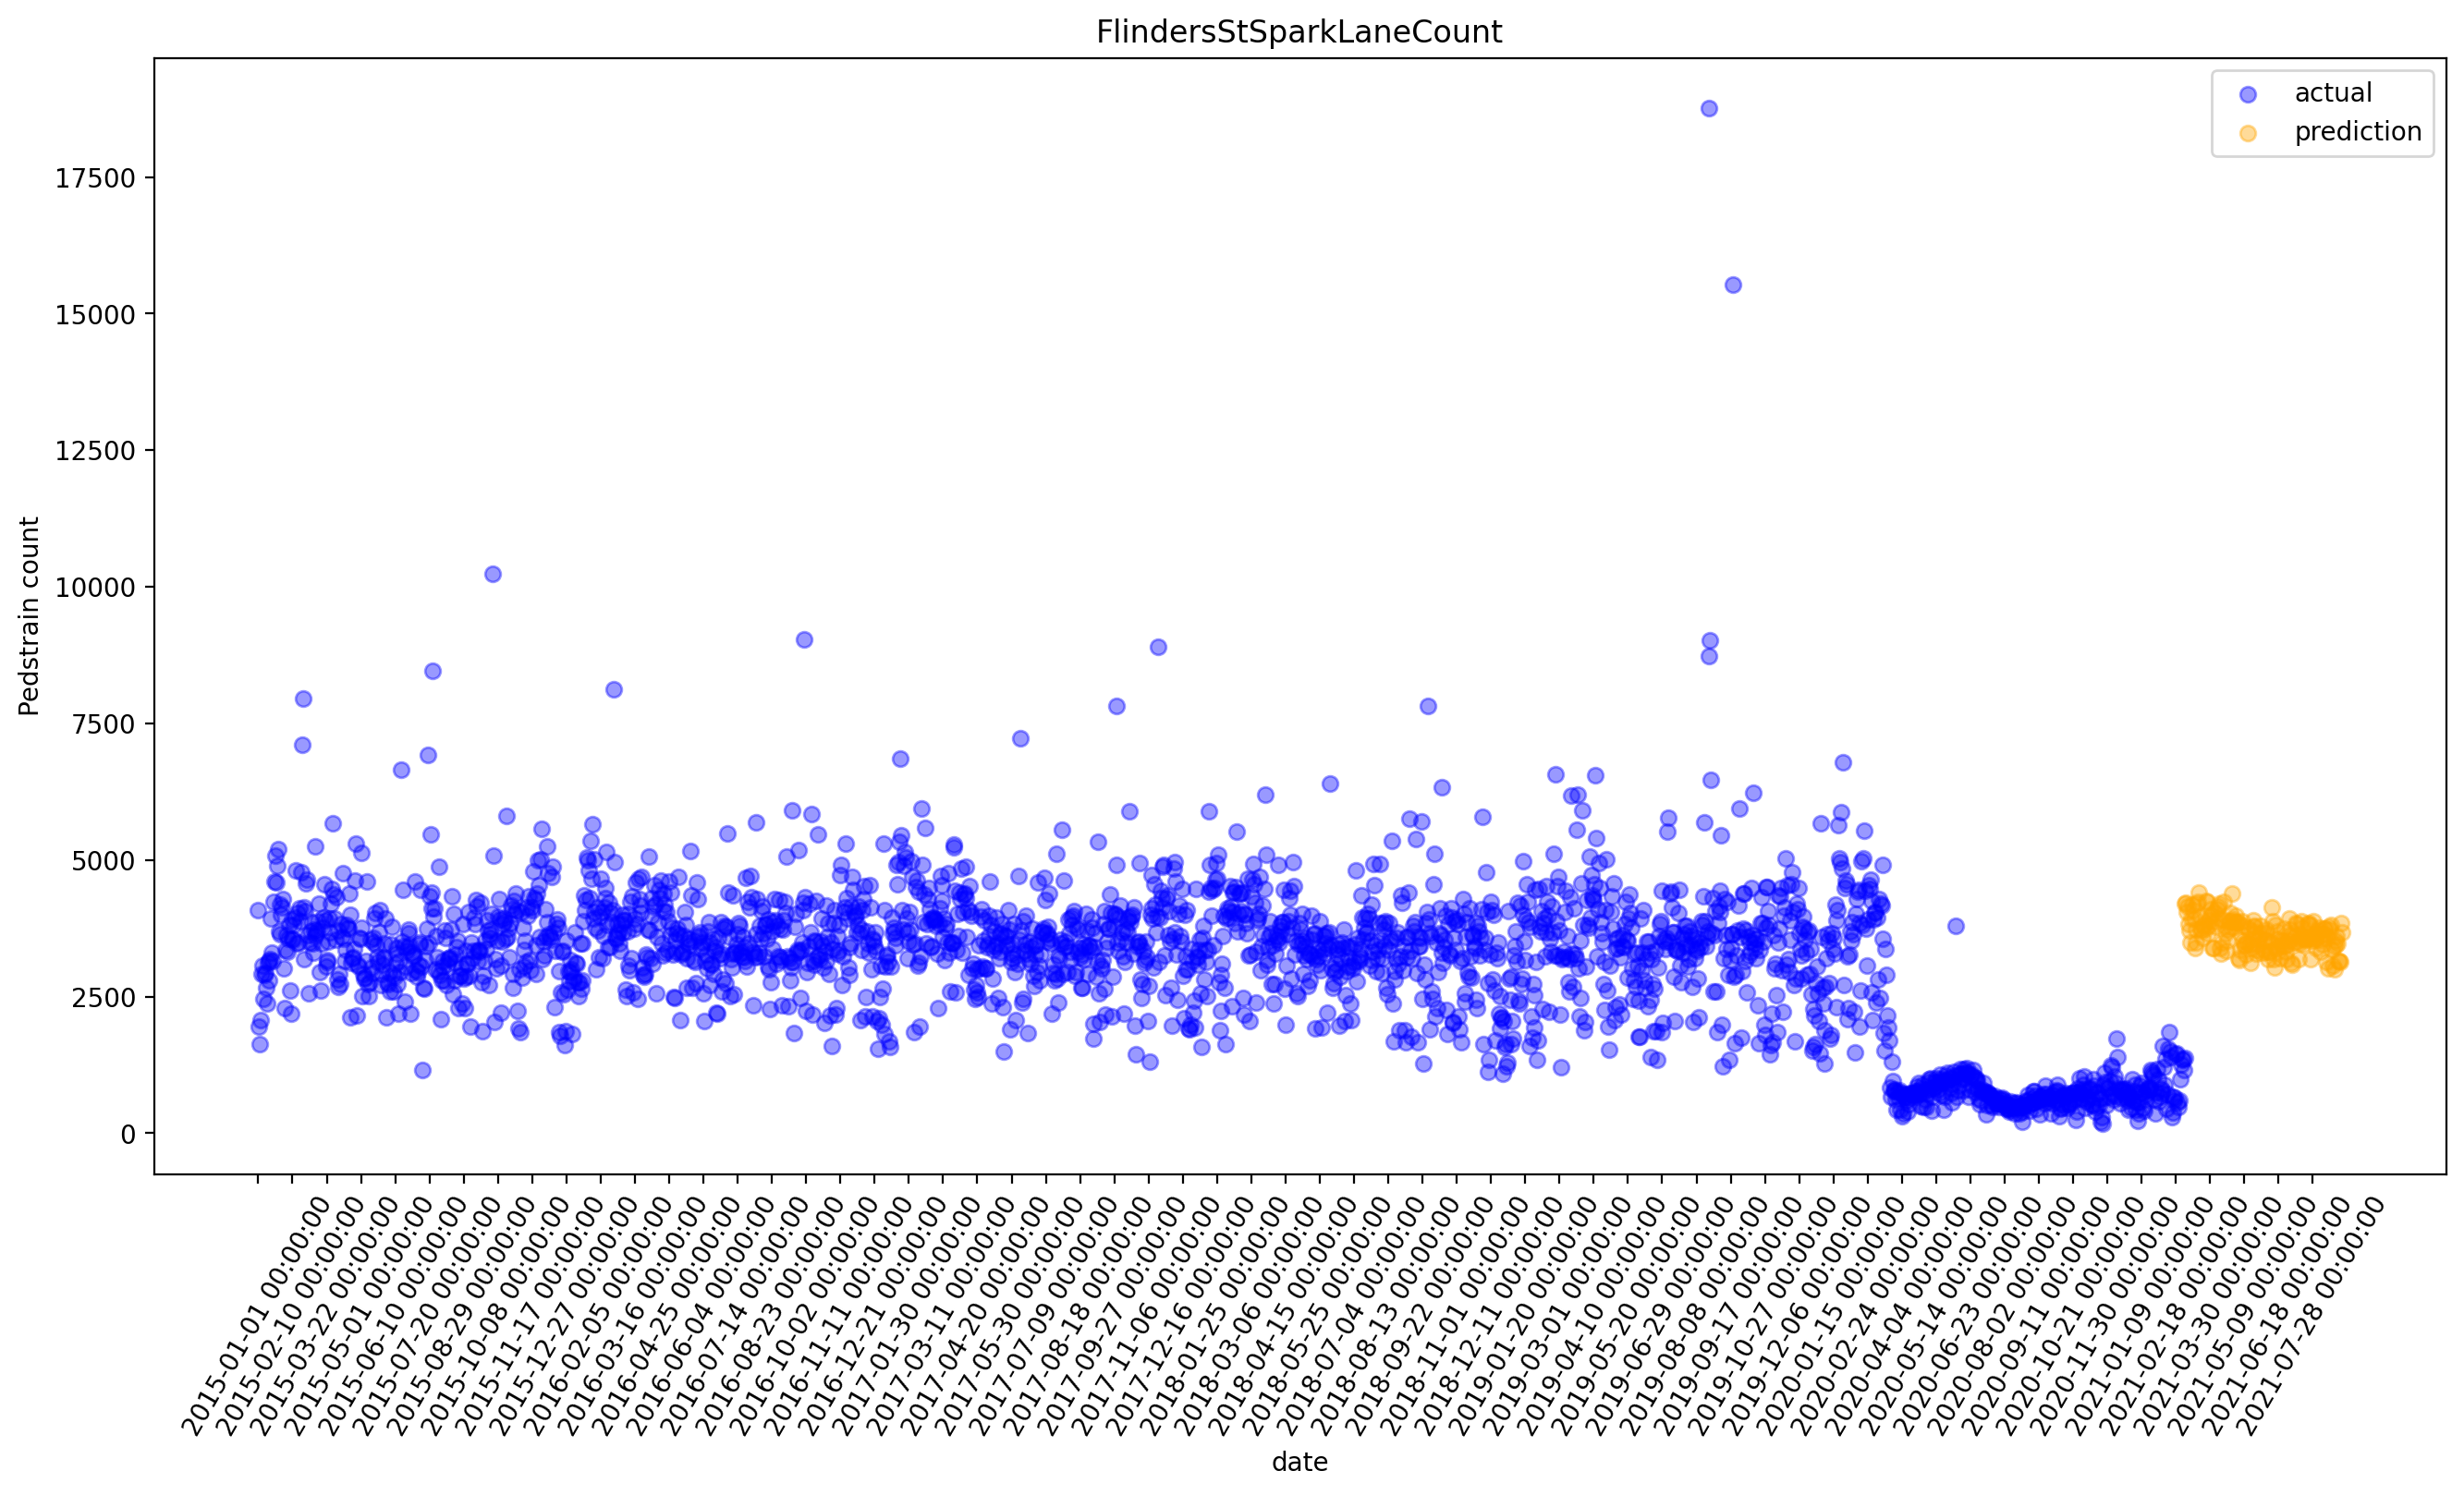

In [34]:


fig , ax = plt.subplots(dpi=200, figsize = (16,8))
ax.scatter(range(2251), result['FlindersStSparkLaneCount'][:2251], color = 'blue', alpha=0.4)
ax.scatter(range(2251,2435), result['FlindersStSparkLaneCount'][2251:], color = 'orange', alpha=0.4)
ax.set_xticks(range(0,2435,40))
ax.set_xticklabels(result.date_new[::40], rotation =60);
ax.set_xlabel('date')

ax.set_ylabel('Pedstrain count')
ax.set_title('FlindersStSparkLaneCount')
ax.legend(['actual','prediction'])


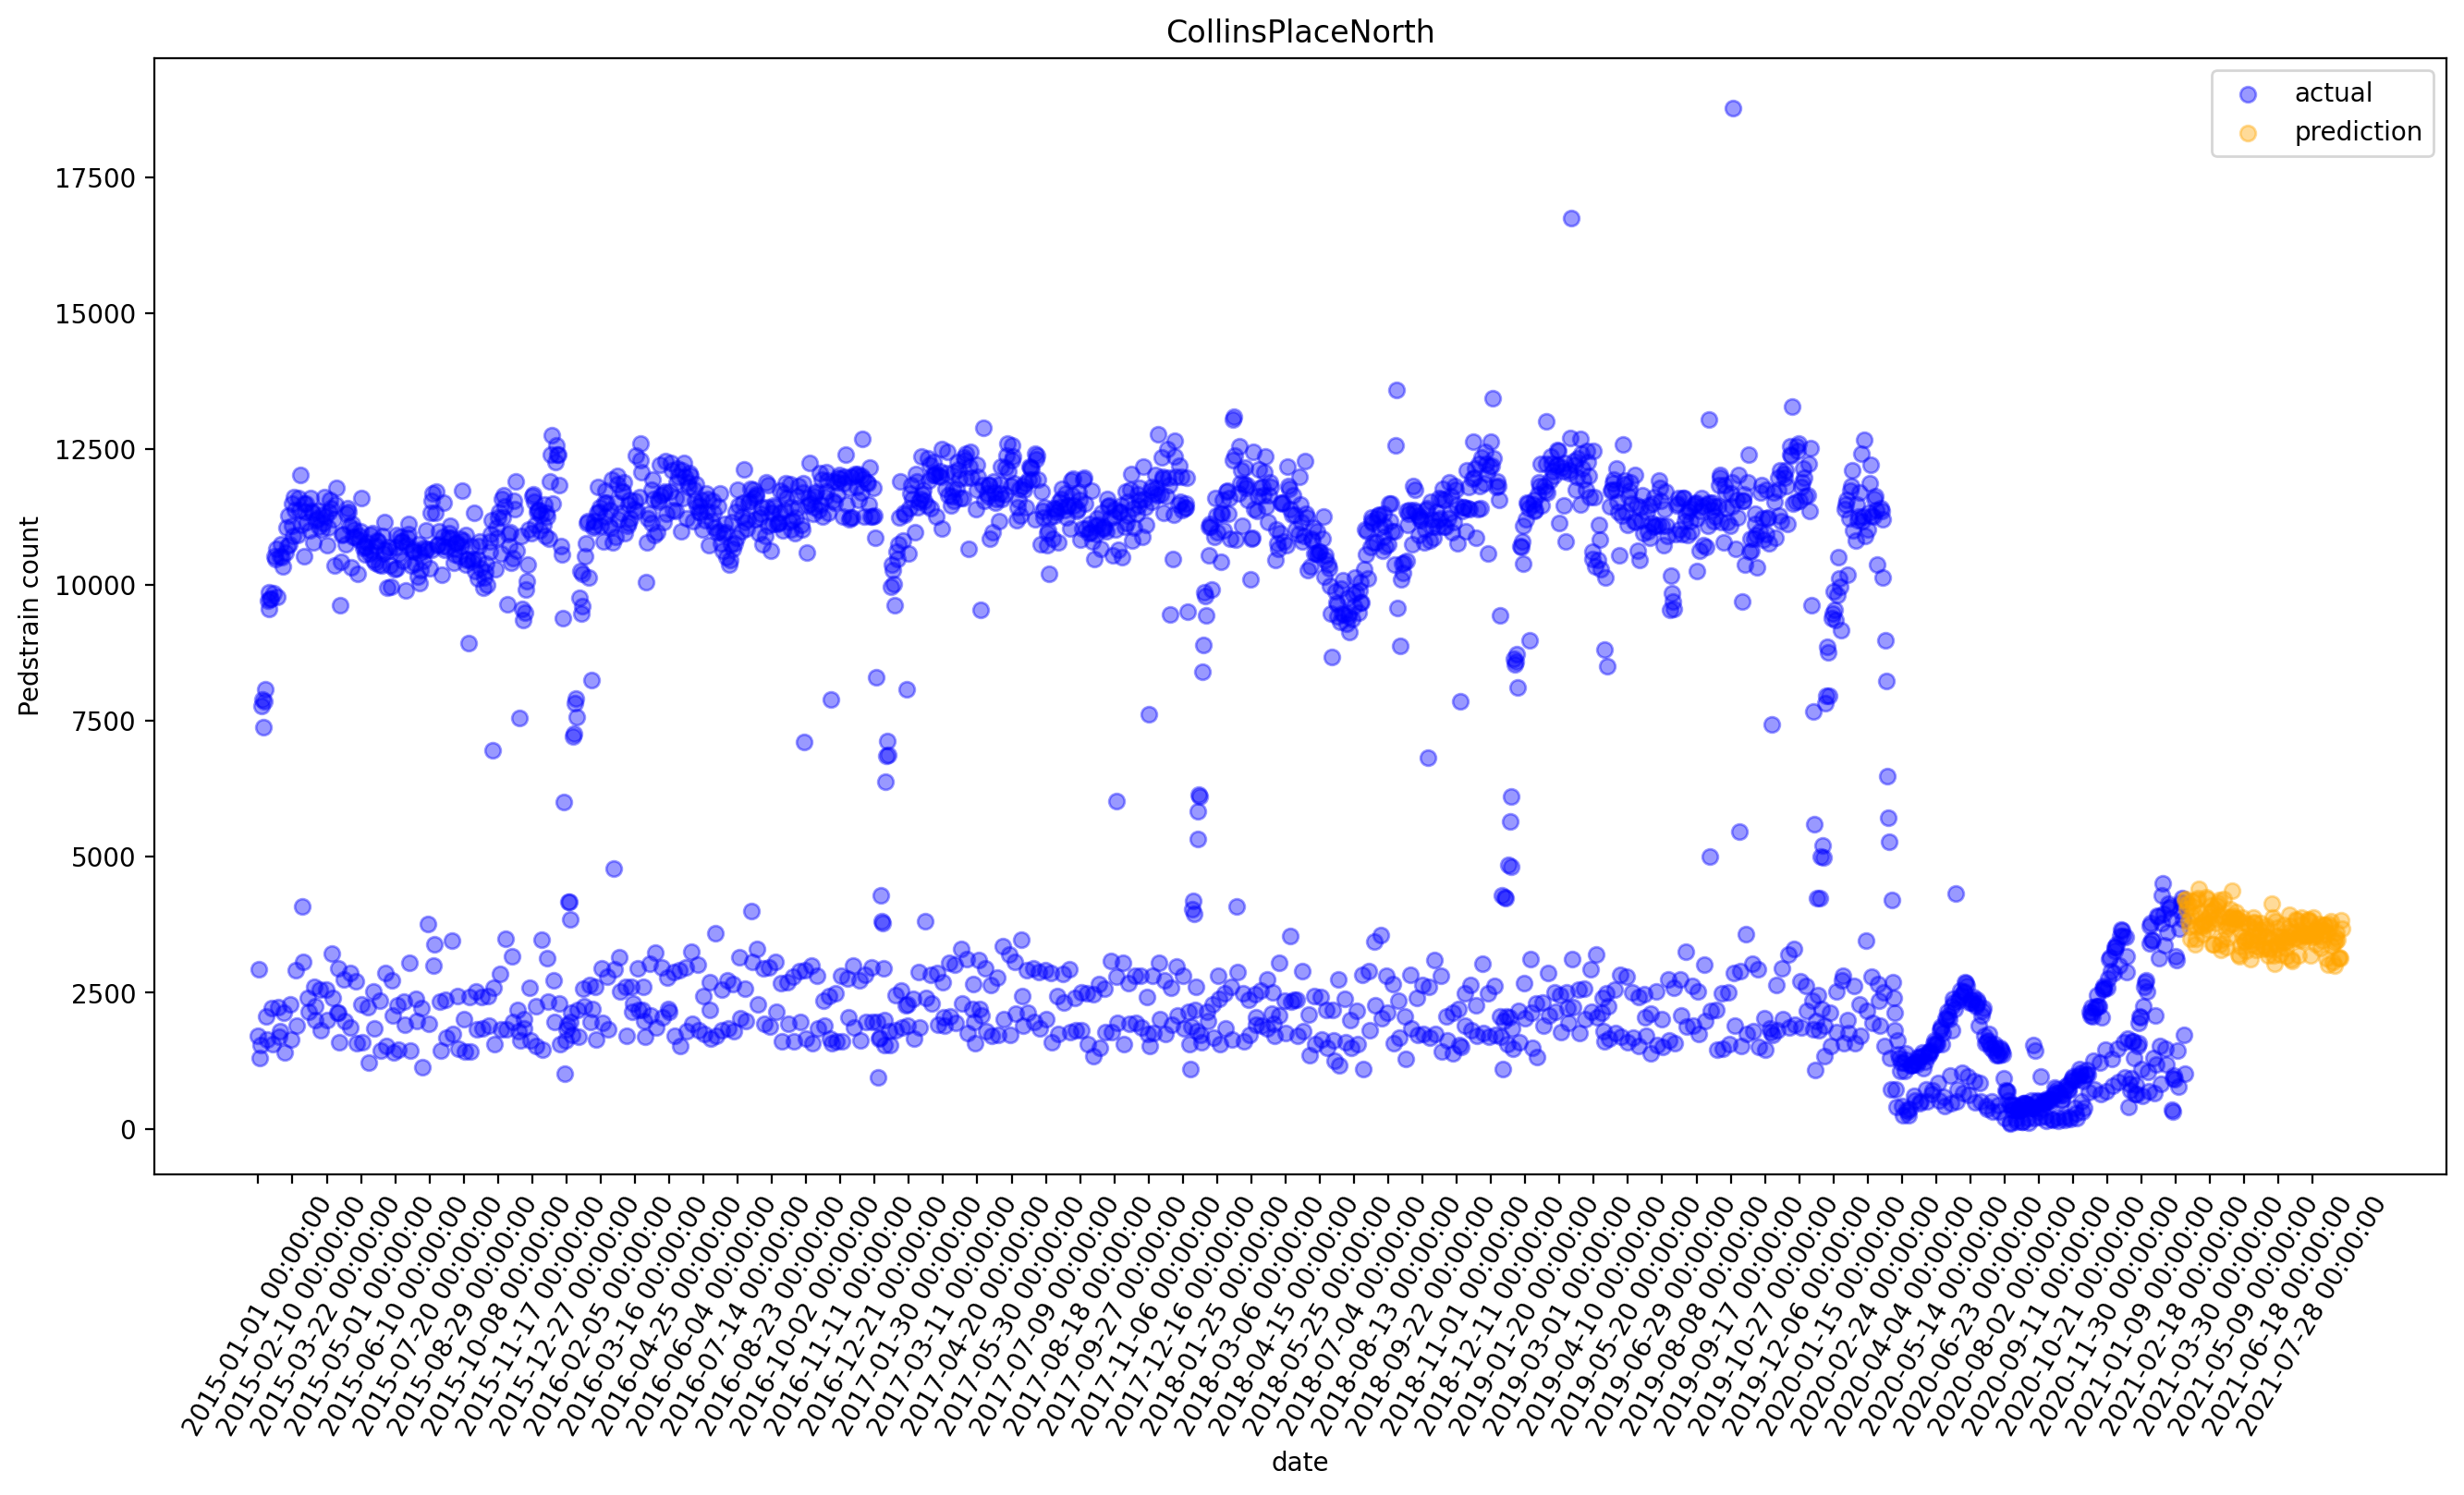

In [35]:
fig , ax = plt.subplots(dpi=200, figsize = (16,8))
ax.scatter(range(2251), result['CollinsPlaceNorth'][:2251], color = 'blue', alpha=0.4)
ax.scatter(range(2251,2435), result['CollinsPlaceNorth'][2251:], color = 'orange', alpha=0.4)
ax.set_xticks(range(0,2435,40))
ax.set_xticklabels(result.date_new[::40], rotation =60);
ax.set_xlabel('date')

ax.set_ylabel('Pedstrain count')
ax.set_title('CollinsPlaceNorth')
ax.legend(['actual','prediction'])

In [38]:
result.to_csv('flinder_and_collin.csv')

In [37]:
import pickle

filename = 'flinder_collin_model.sav'
pickle.dump(knn_max, open(filename, 'wb'))